In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P2\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
863,2020-07-03,United Kingdom,314591.0,283757.0,44101.0,43995.0,30834.0,106.0
864,2020-07-03,Germany,195261.0,195674.0,9005.0,9003.0,-413.0,2.0
865,2020-07-03,Iran,233272.0,232863.0,11094.0,11106.0,409.0,-12.0
866,2020-07-03,Turkey,202305.0,202284.0,5165.0,5167.0,21.0,-2.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  2639.769585253456
RMSE =  6307.286438079498


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  315.0852534562212
RMSE =  722.4933498330593


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAPE =  13291.835294117647
RMSE =  16706.562072501718
-- World performances for deaths --
MAPE =  1593.9529411764706
RMSE =  1941.5450306089615


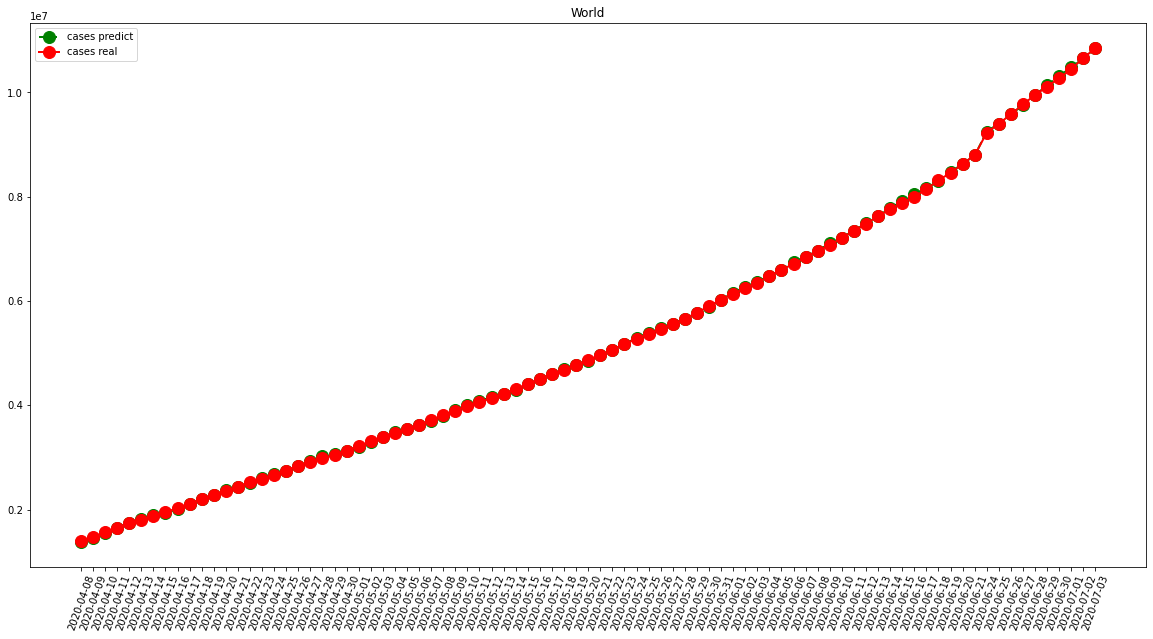

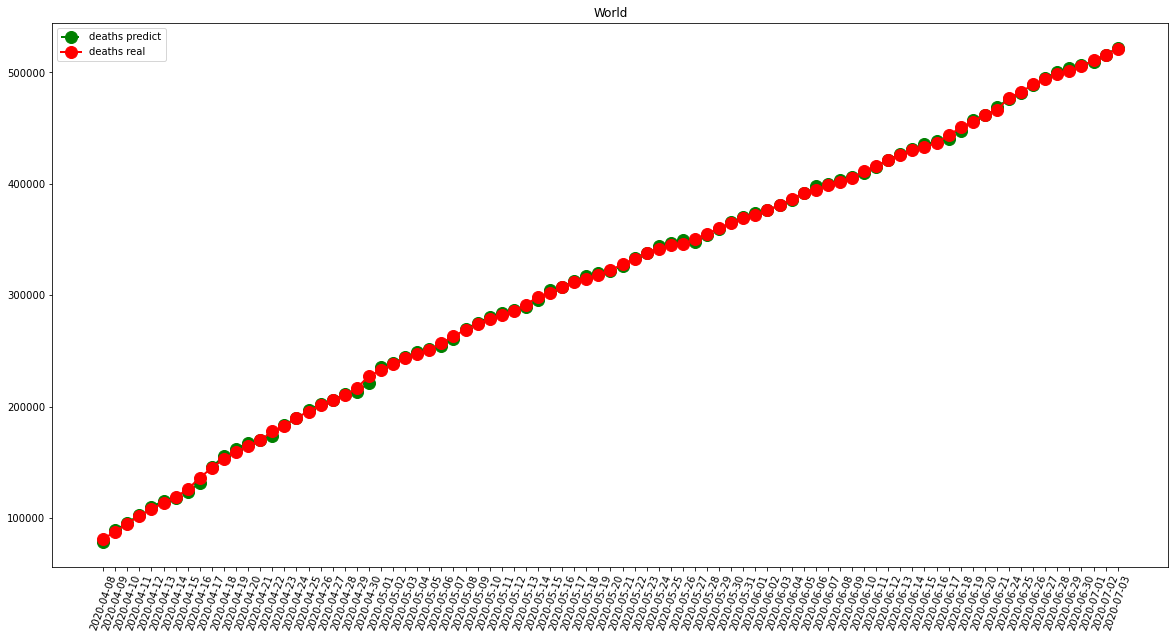

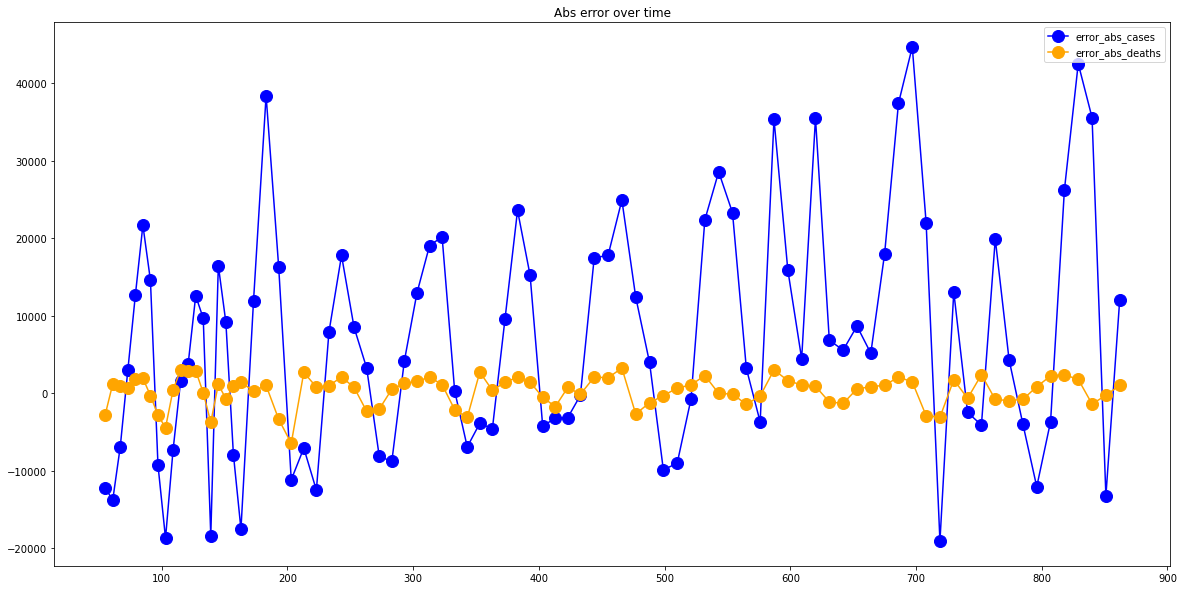

In [7]:
visShow("World")

-- France performances for cases --
MAPE =  890.2315789473685
RMSE =  1477.3381325528483
-- France performances for deaths --
MAPE =  185.1578947368421
RMSE =  343.6356087179374


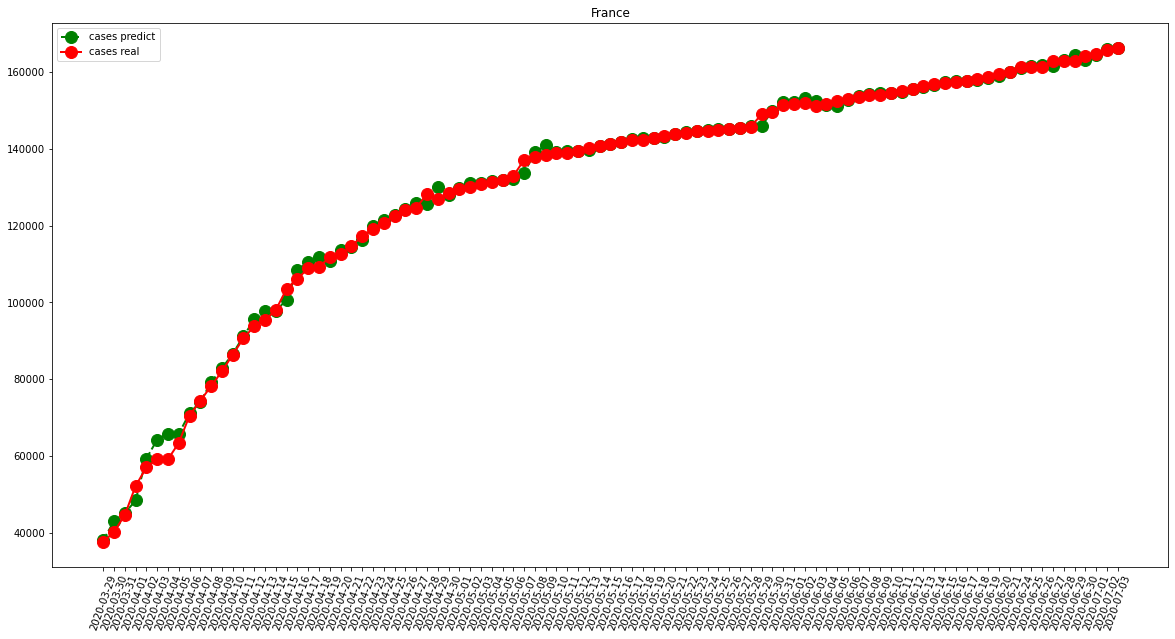

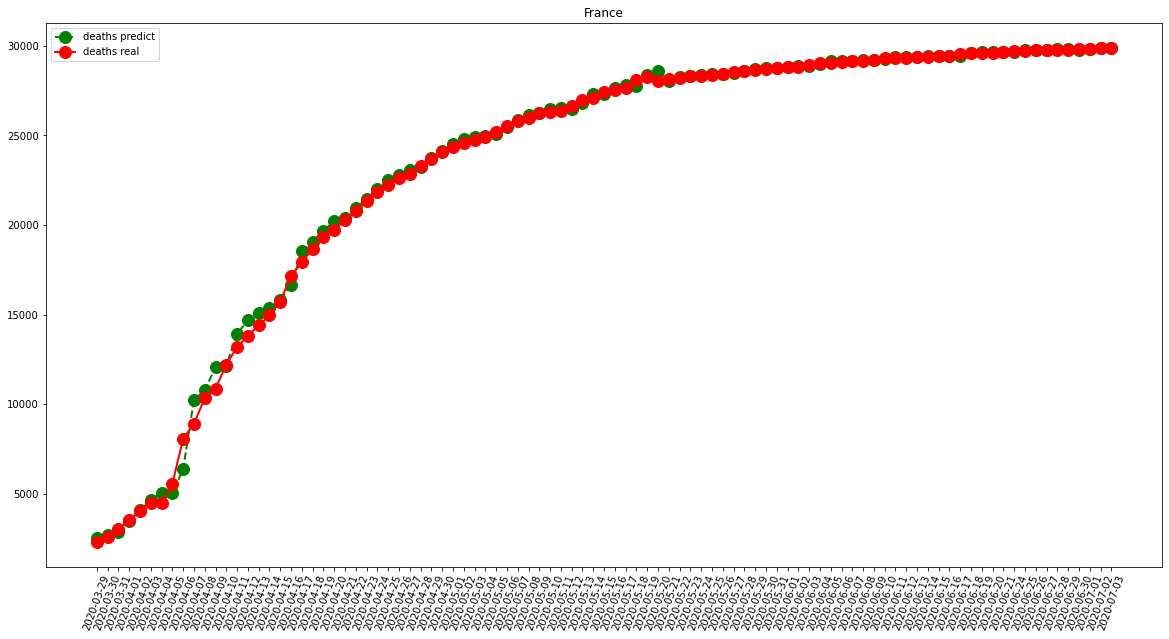

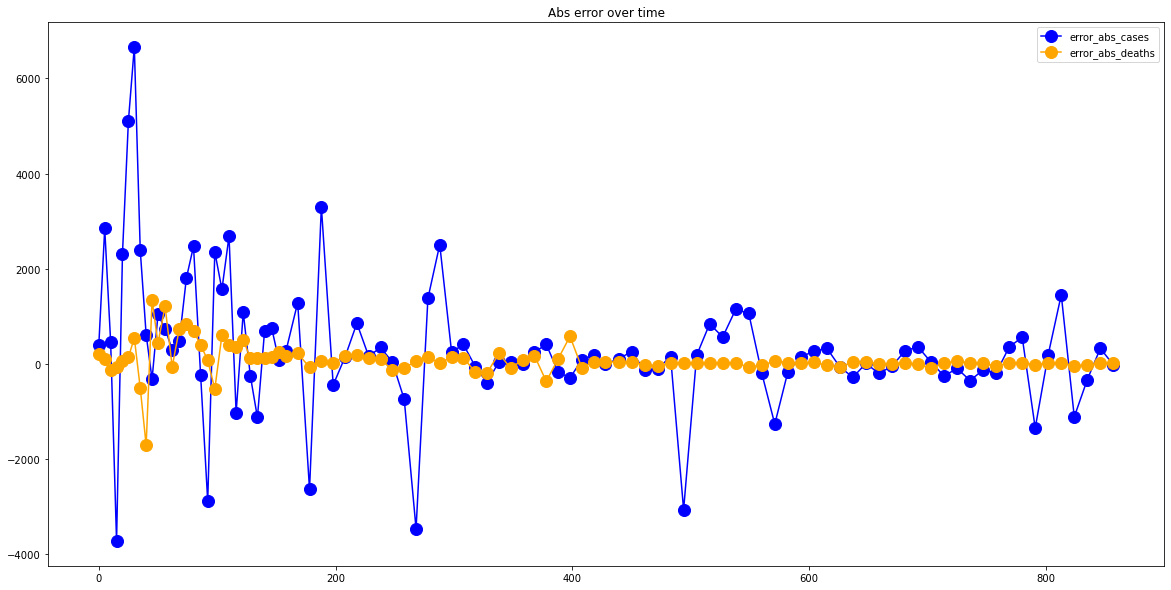

In [8]:
visShow("France")

-- Italy performances for cases --
MAPE =  384.62105263157895
RMSE =  555.6321482874496
-- Italy performances for deaths --
MAPE =  101.17894736842105
RMSE =  303.3379910959148


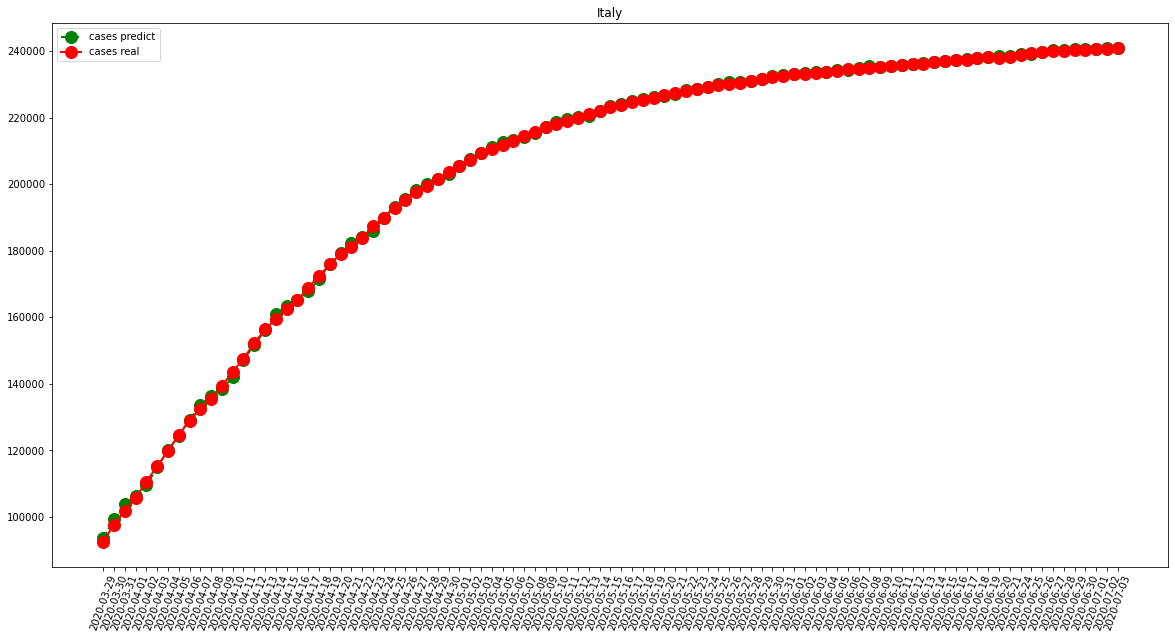

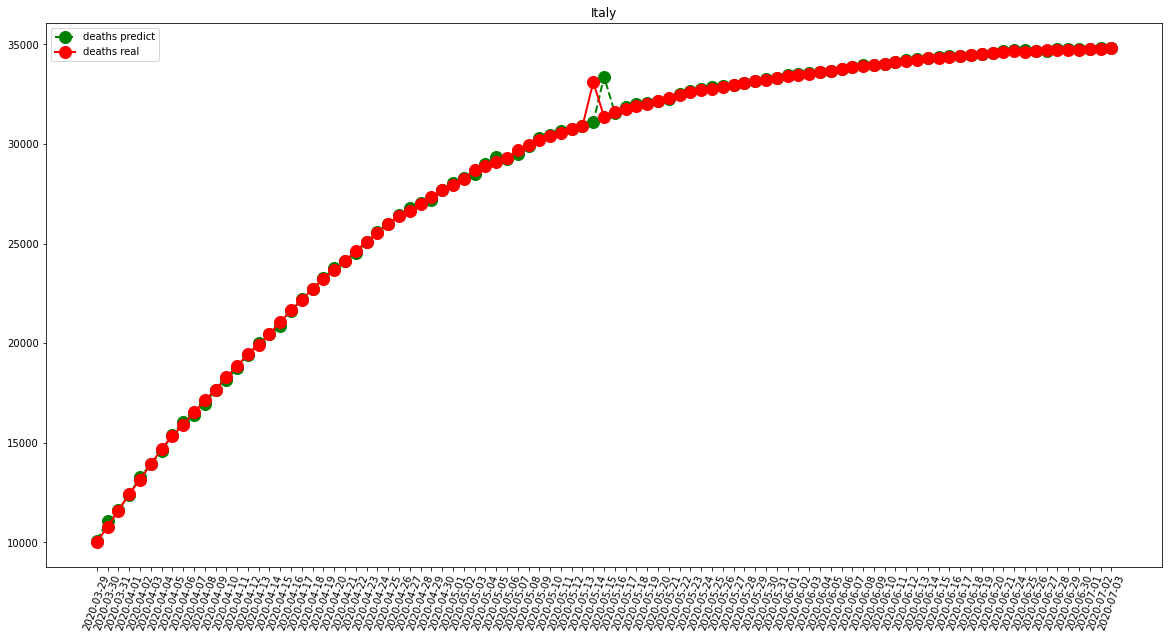

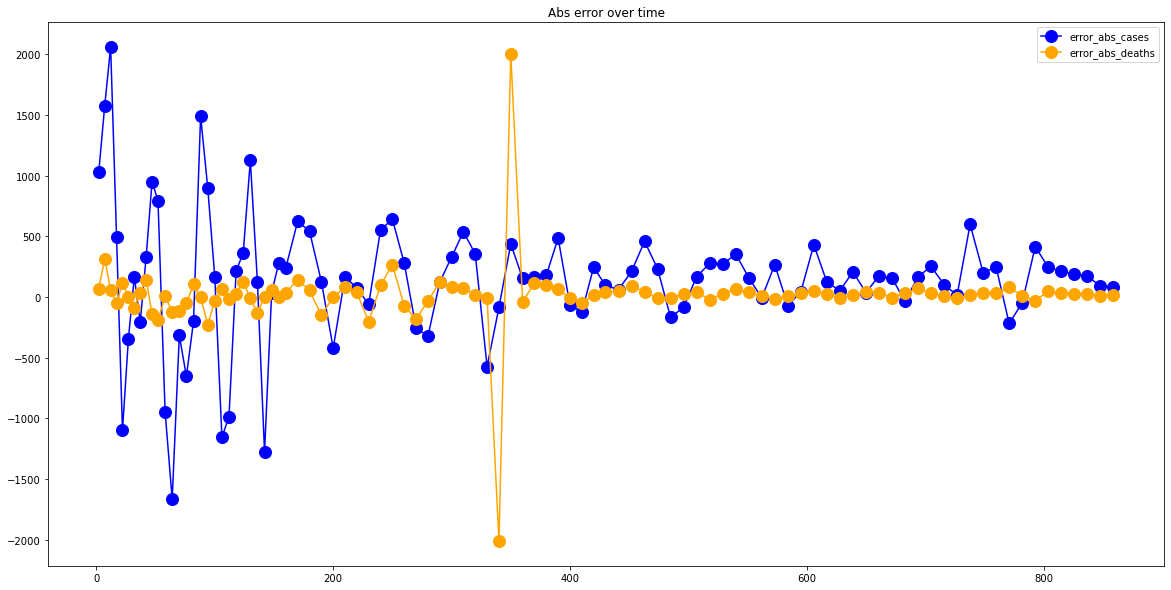

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAPE =  872.6105263157895
RMSE =  2096.924539966994
-- Spain performances for deaths --
MAPE =  190.17894736842106
RMSE =  416.4099574116581


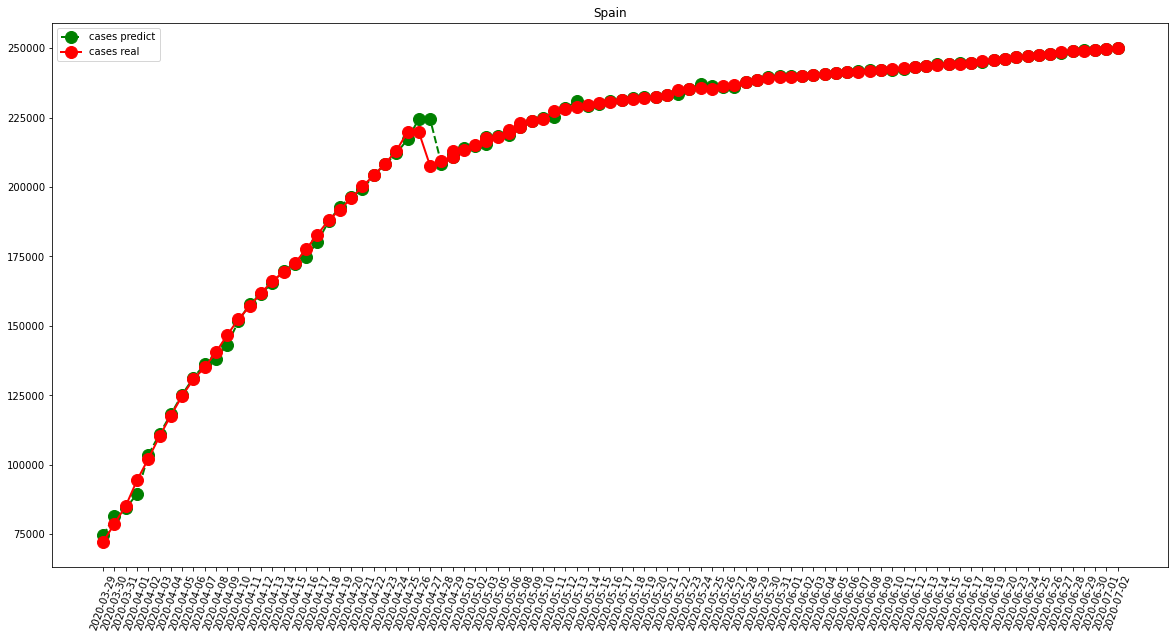

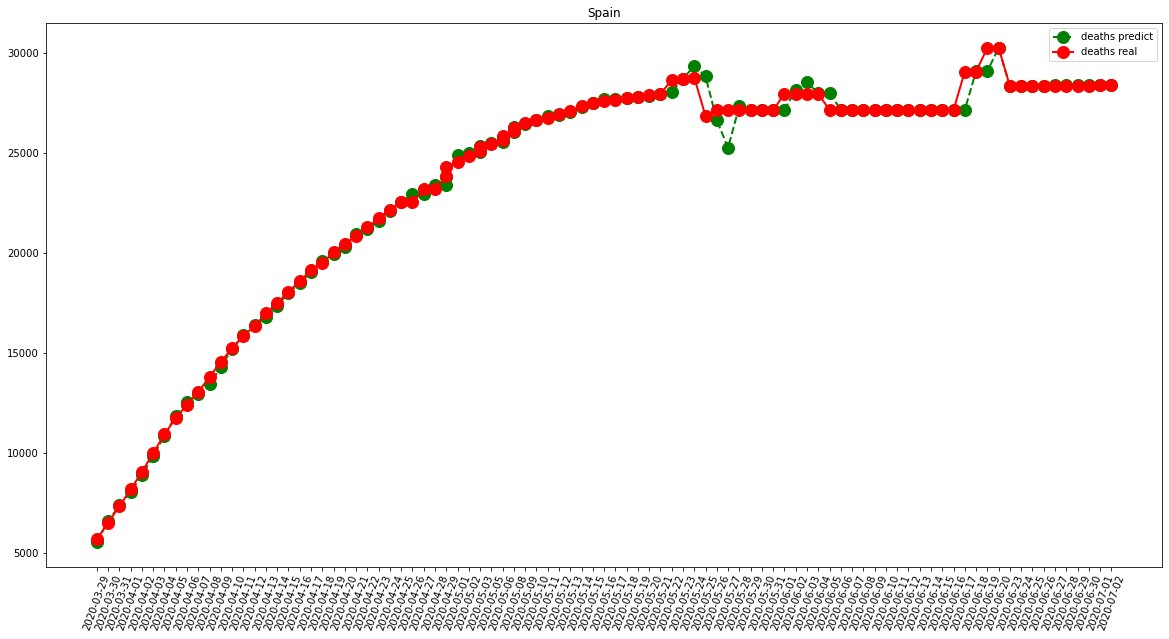

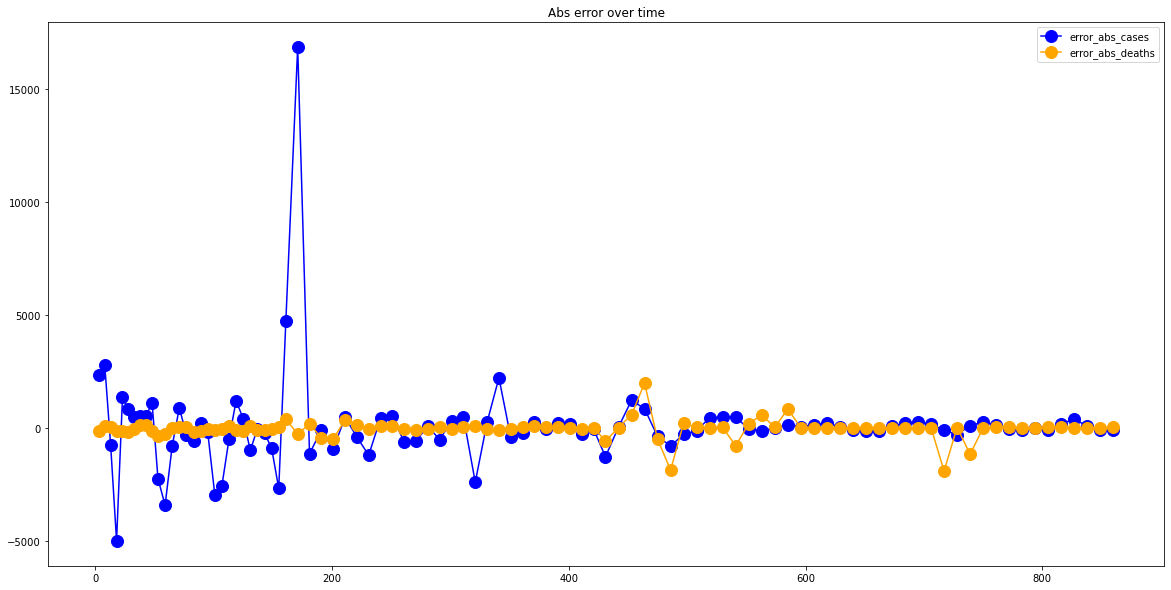

In [10]:
visShow("Spain")

-- United States performances for cases --
MAPE =  4848.263157894737
RMSE =  6650.728230011634
-- United States performances for deaths --
MAPE =  544.3157894736842
RMSE =  794.8684498906589


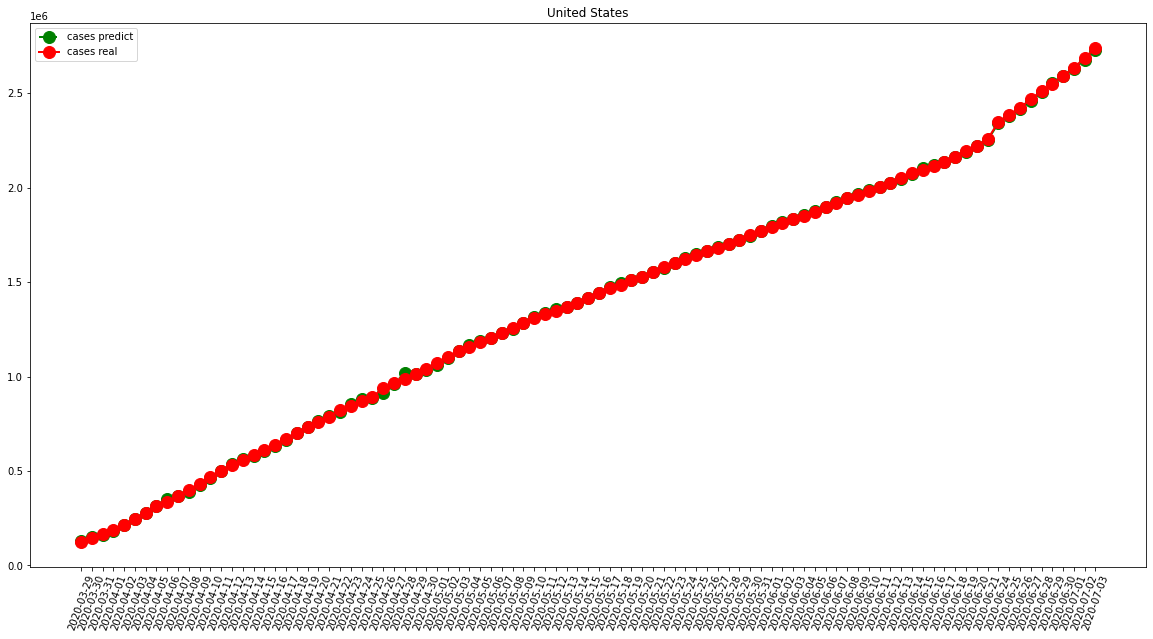

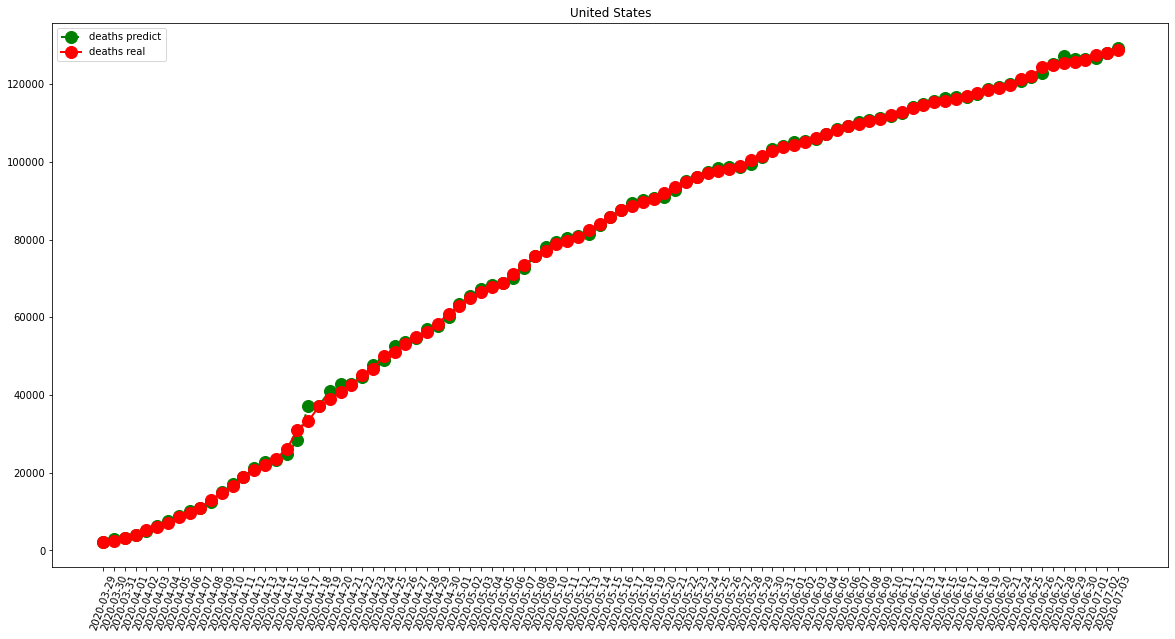

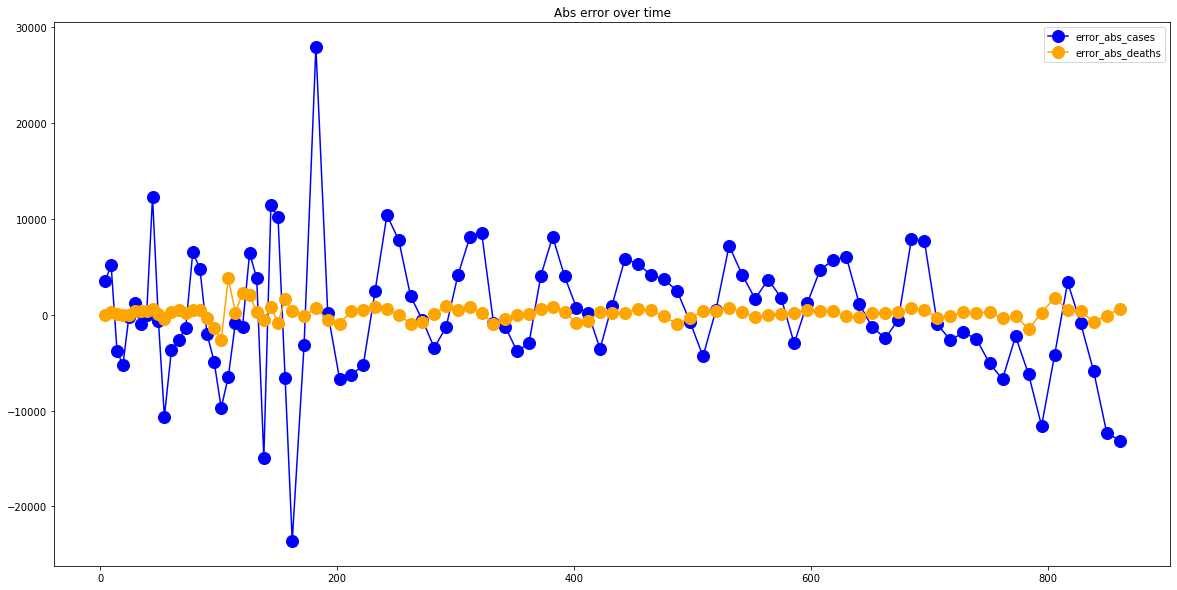

In [11]:
visShow("United States")

-- China performances for cases --
MAPE =  92.0421052631579
RMSE =  120.64859804625297
-- China performances for deaths --
MAPE =  39.93684210526316
RMSE =  161.01284682318138


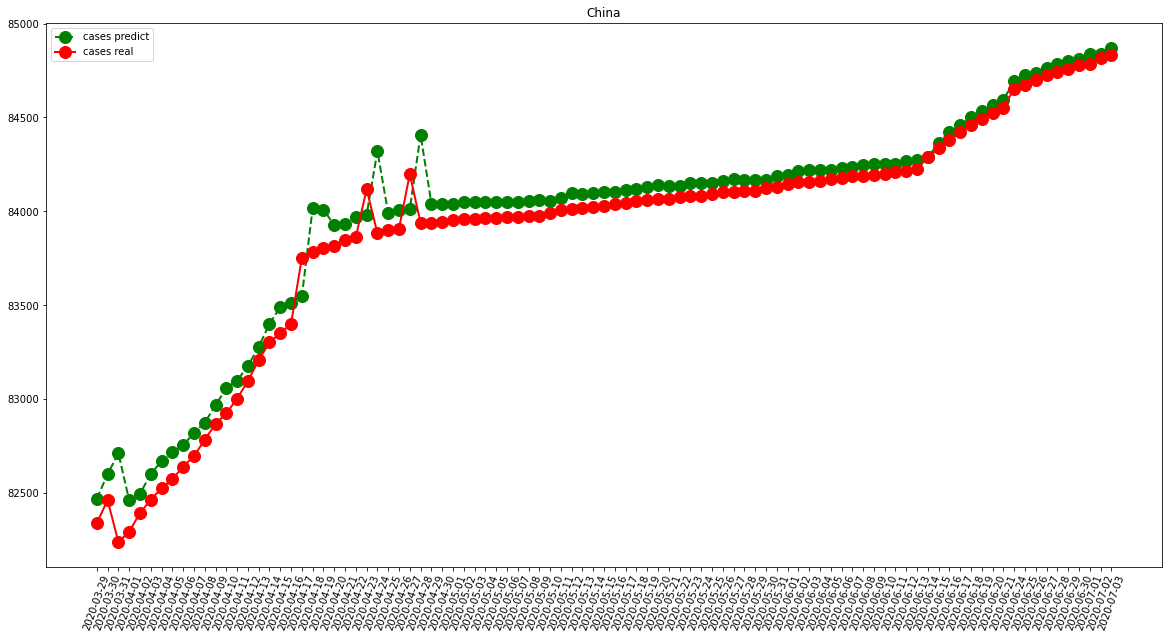

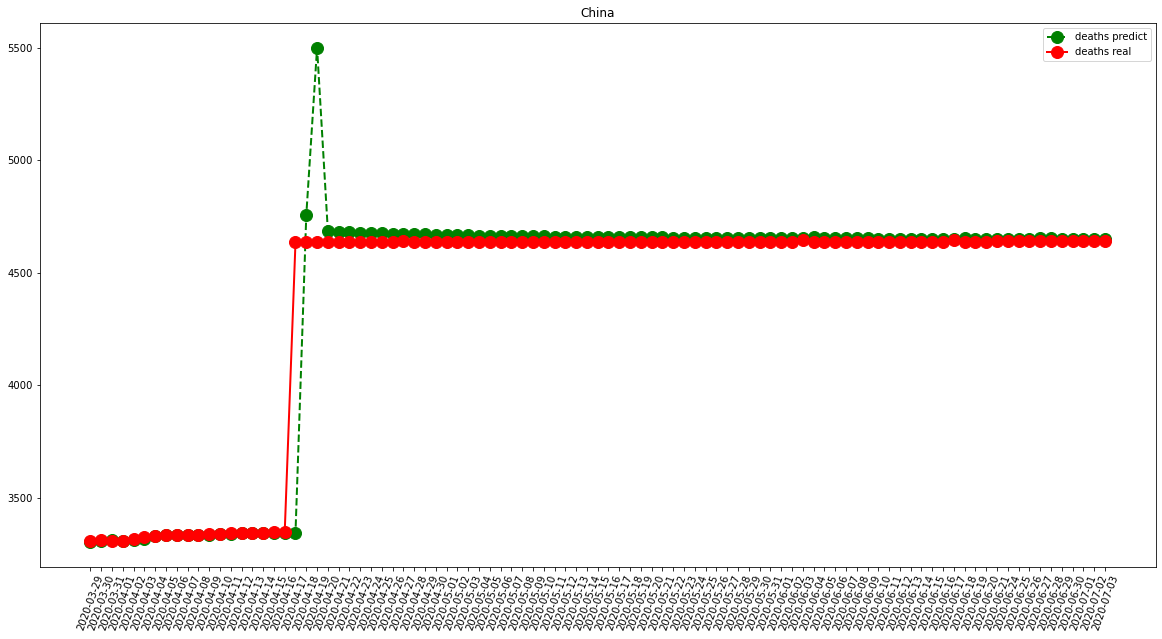

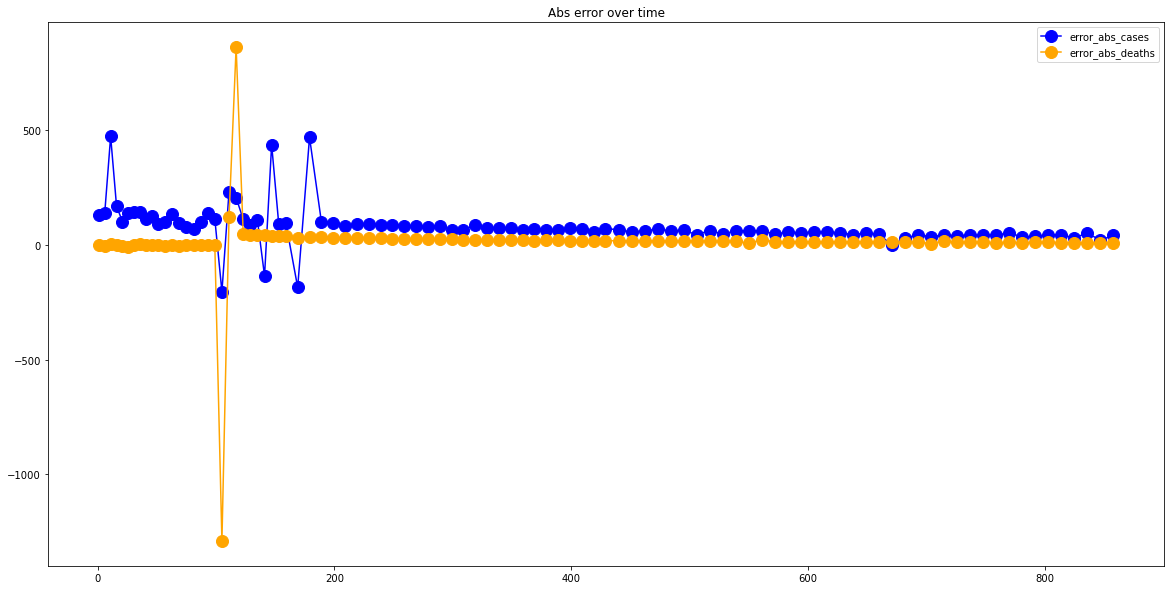

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAPE =  1285.0746268656717
RMSE =  3939.842522801846
-- United Kingdom performances for deaths --
MAPE =  254.62686567164178
RMSE =  596.8502149655956


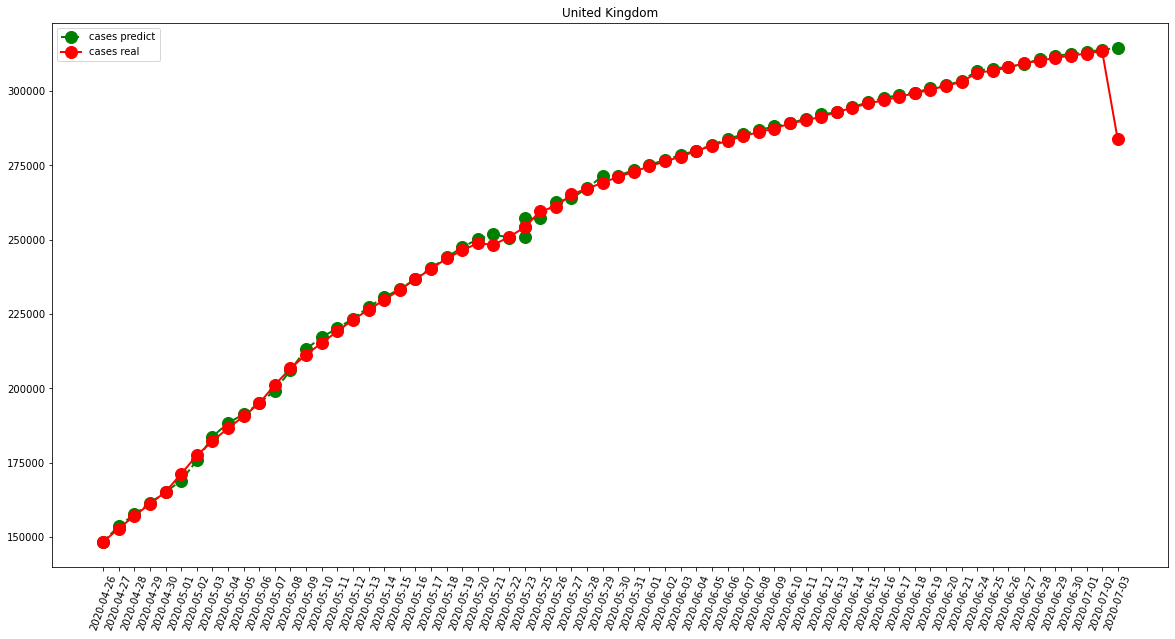

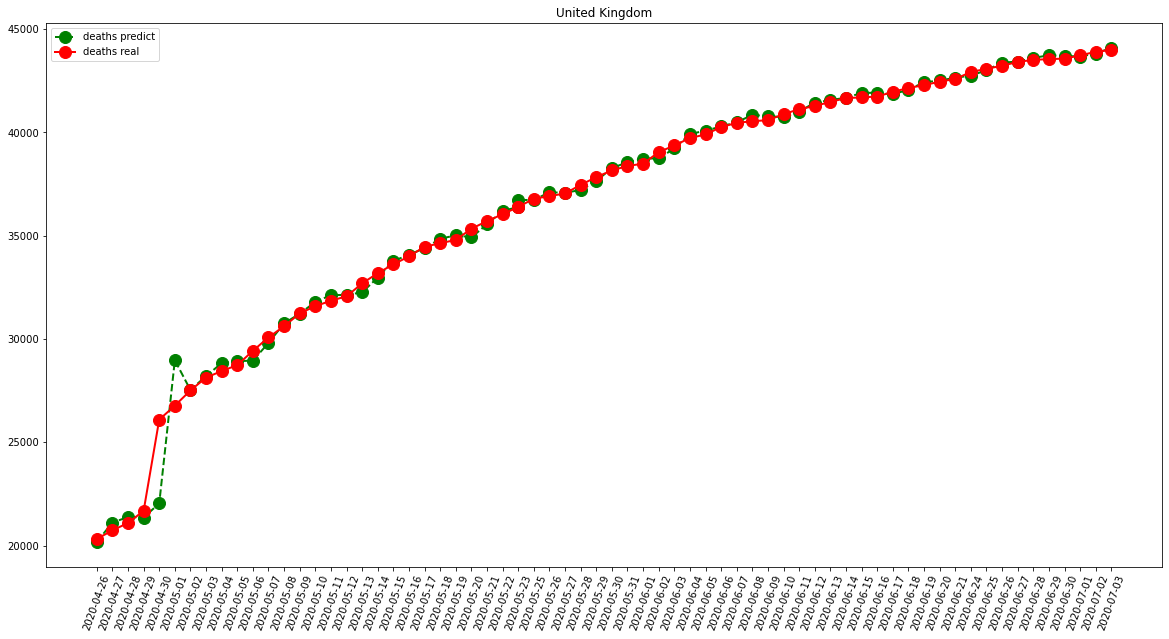

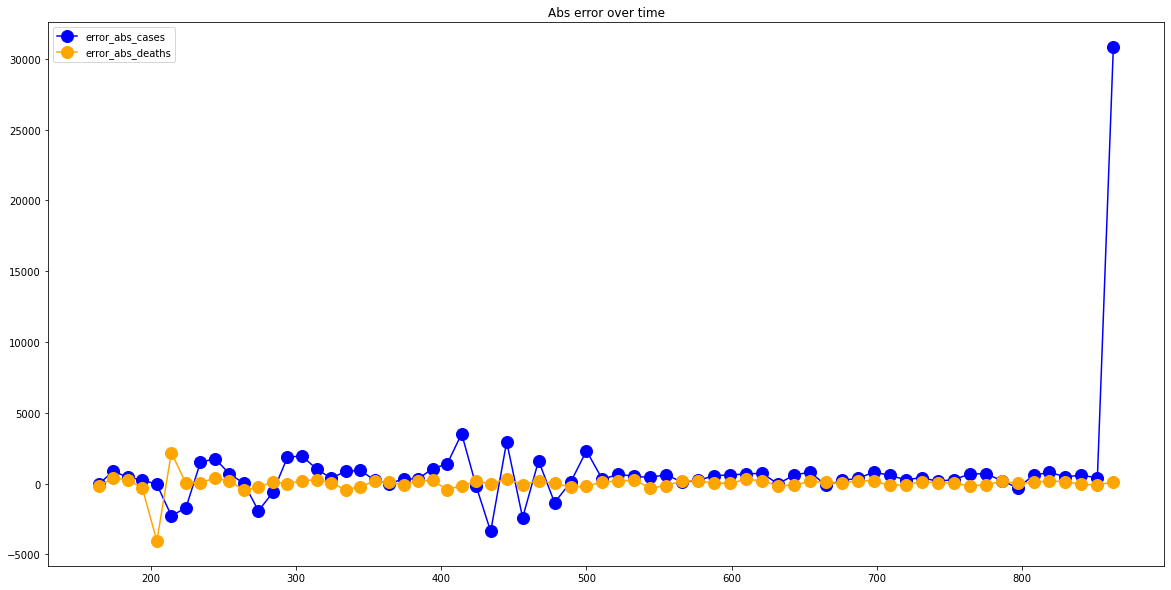

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAPE =  318.2238805970149
RMSE =  449.3975237229931
-- Germany performances for deaths --
MAPE =  32.56716417910448
RMSE =  53.034767531914184


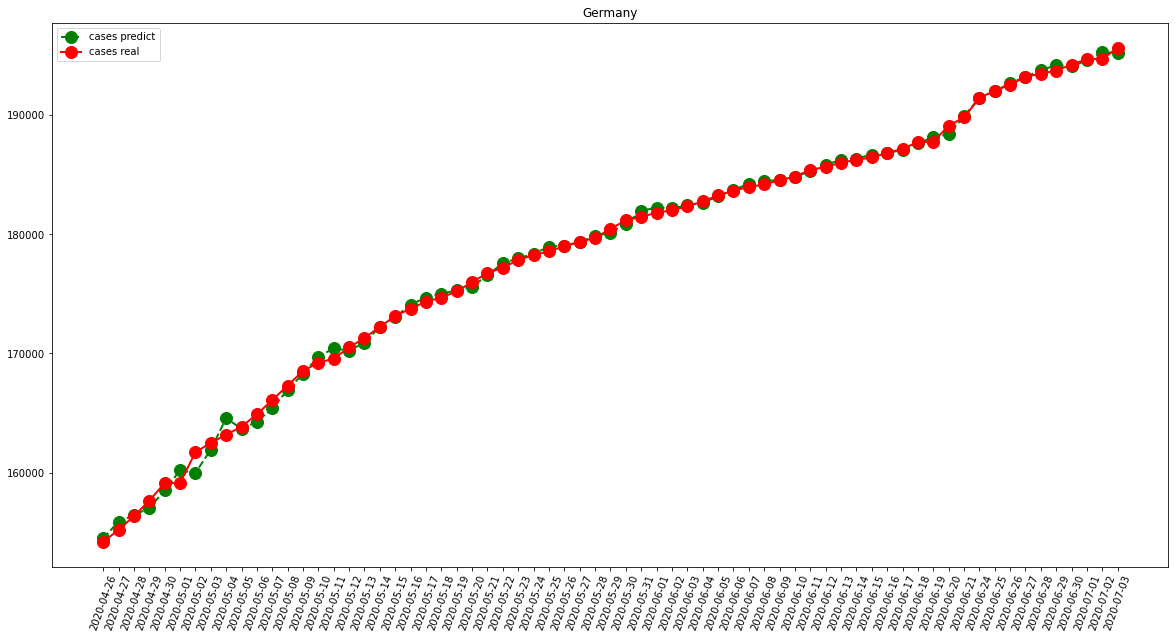

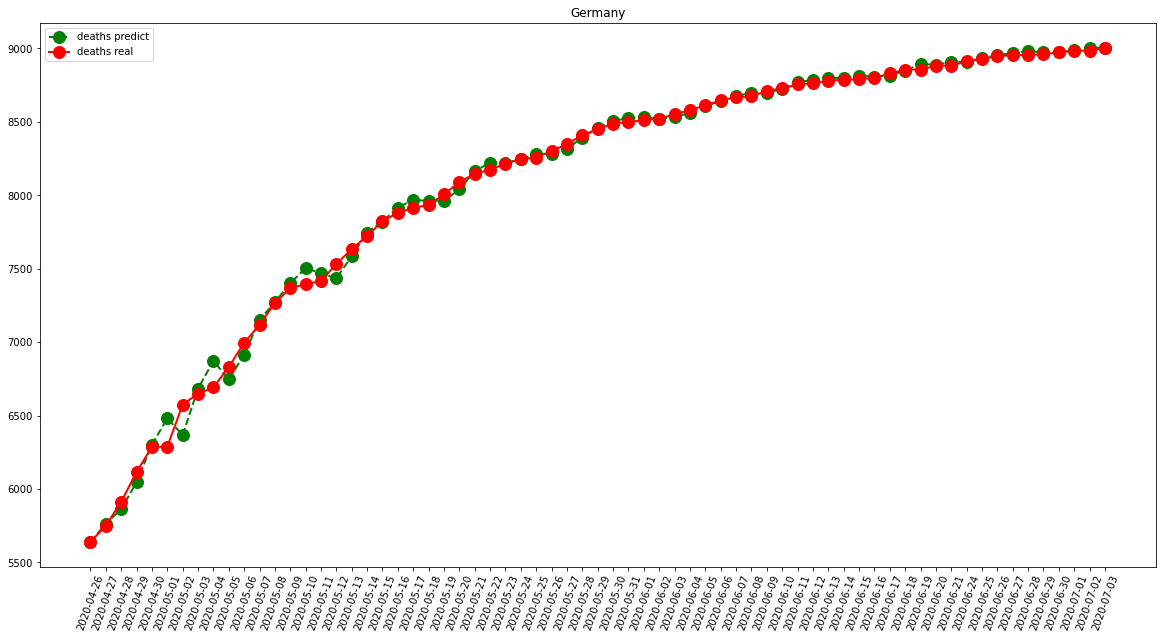

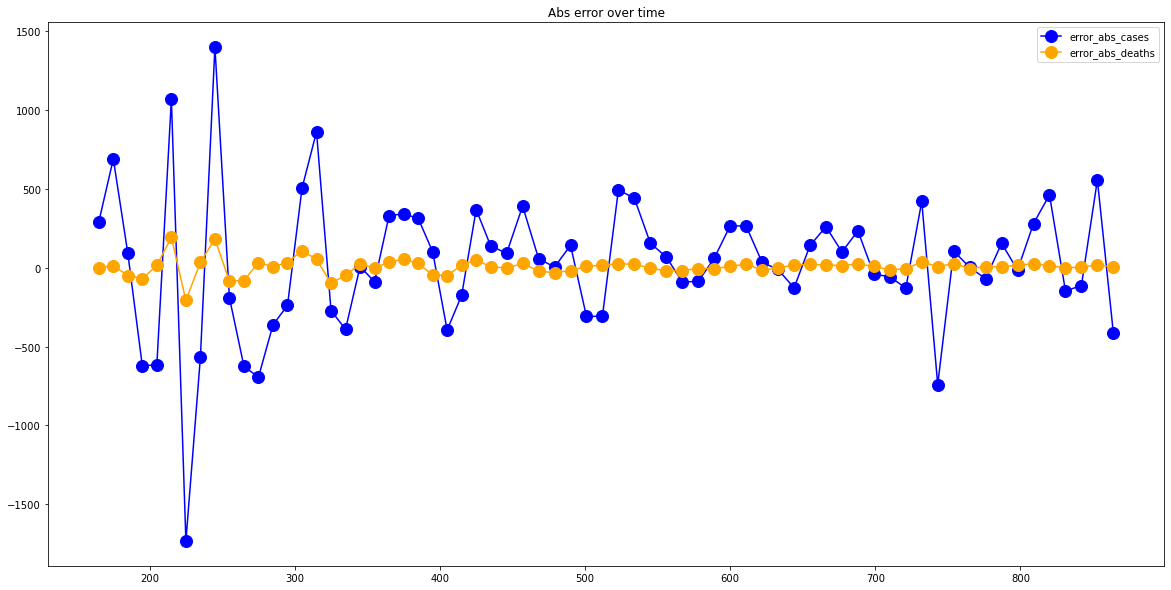

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAPE =  275.53731343283584
RMSE =  352.3120013122697
-- Iran performances for deaths --
MAPE =  17.791044776119403
RMSE =  29.58620089808912


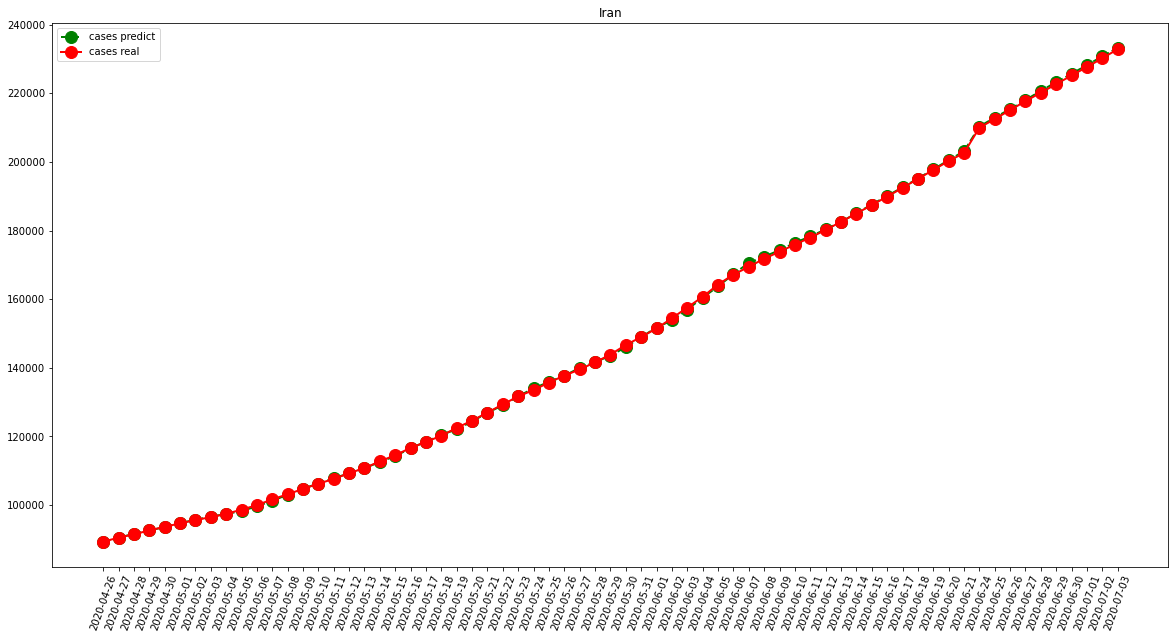

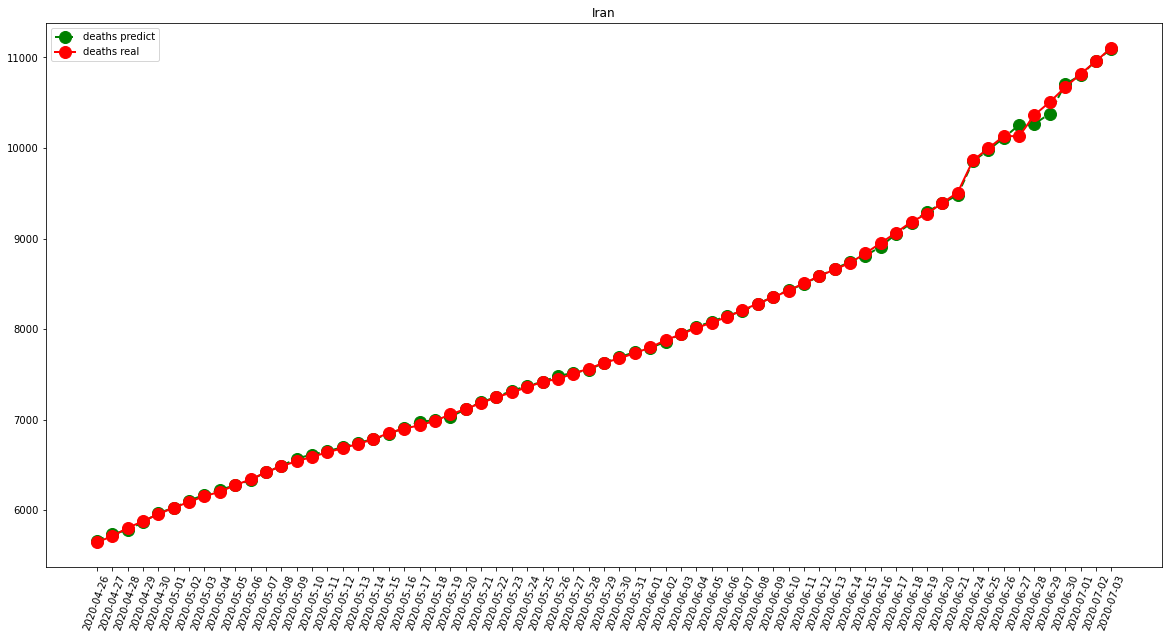

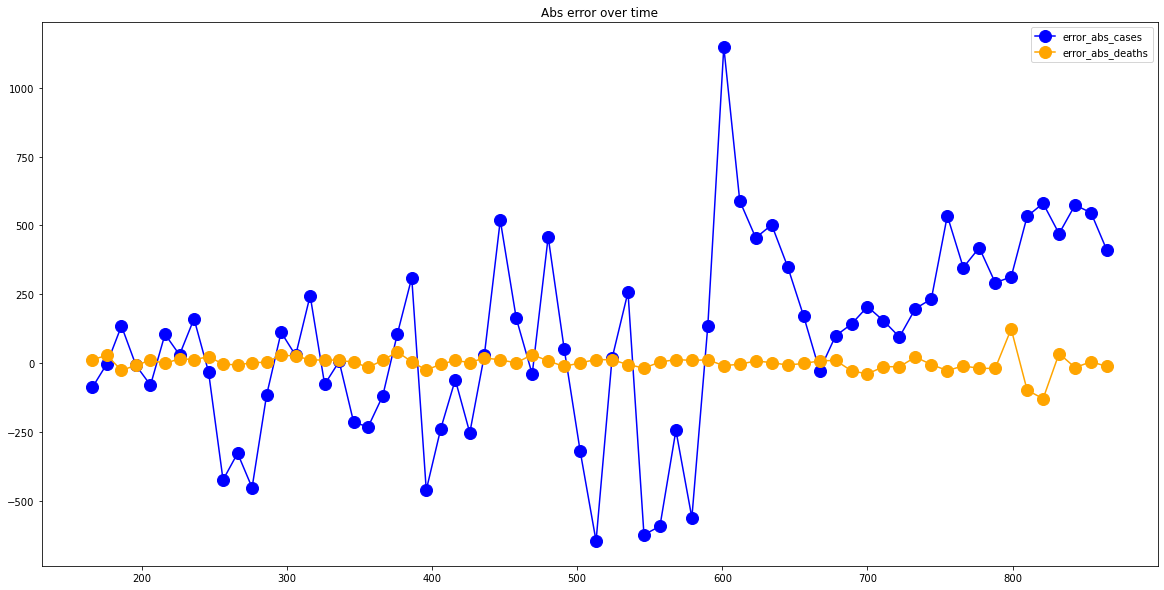

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAPE =  275.86567164179104
RMSE =  419.35766446586933
-- Turkey performances for deaths --
MAPE =  27.29850746268657
RMSE =  124.00258784011234


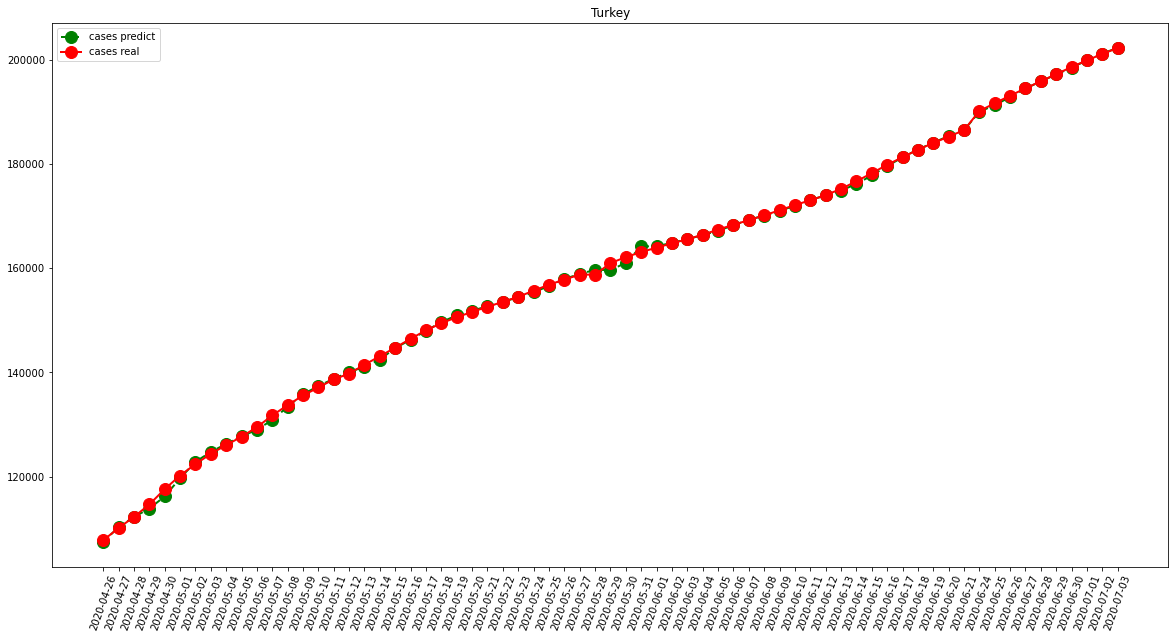

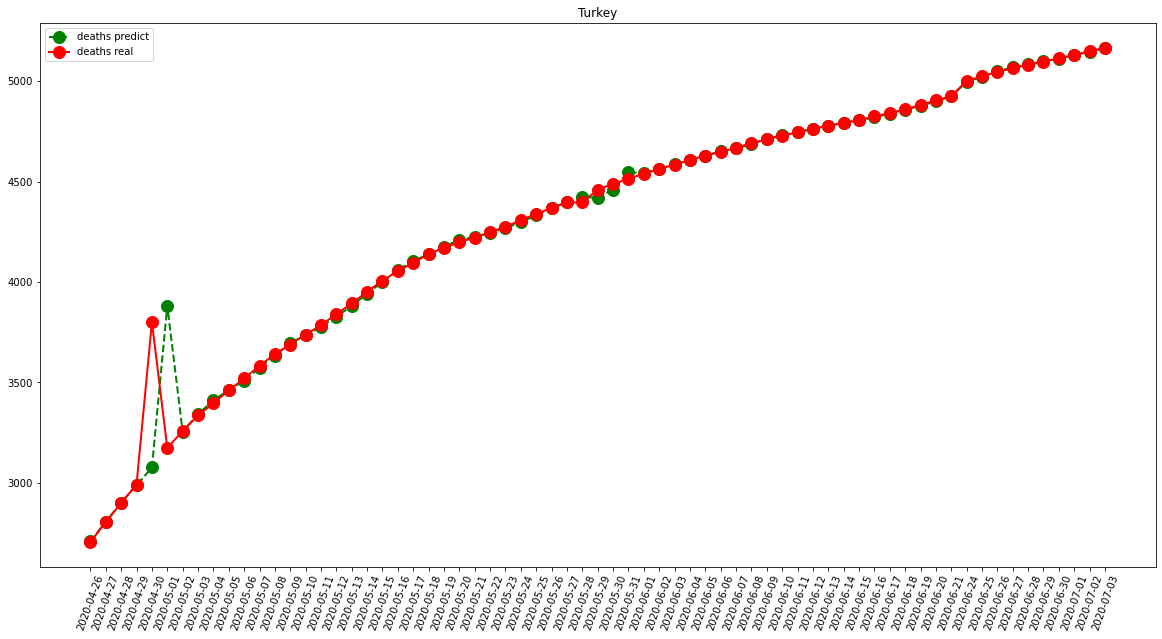

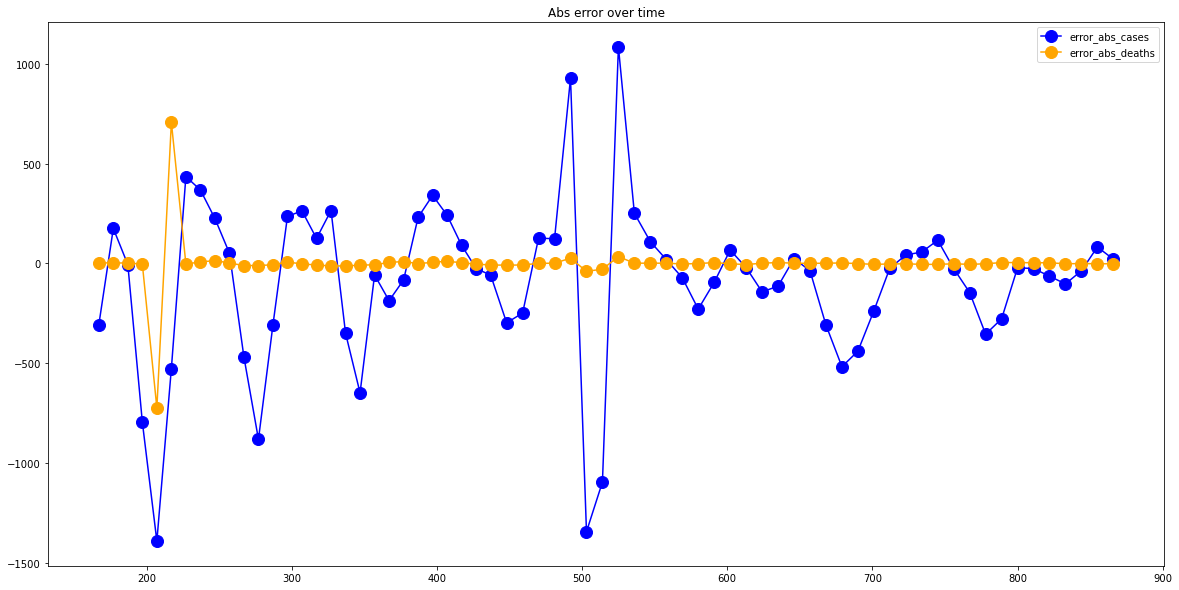

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAPE =  8595.275
RMSE =  11039.600623437425
-- Brazil performances for deaths --
MAPE =  374.3
RMSE =  464.08517537193535


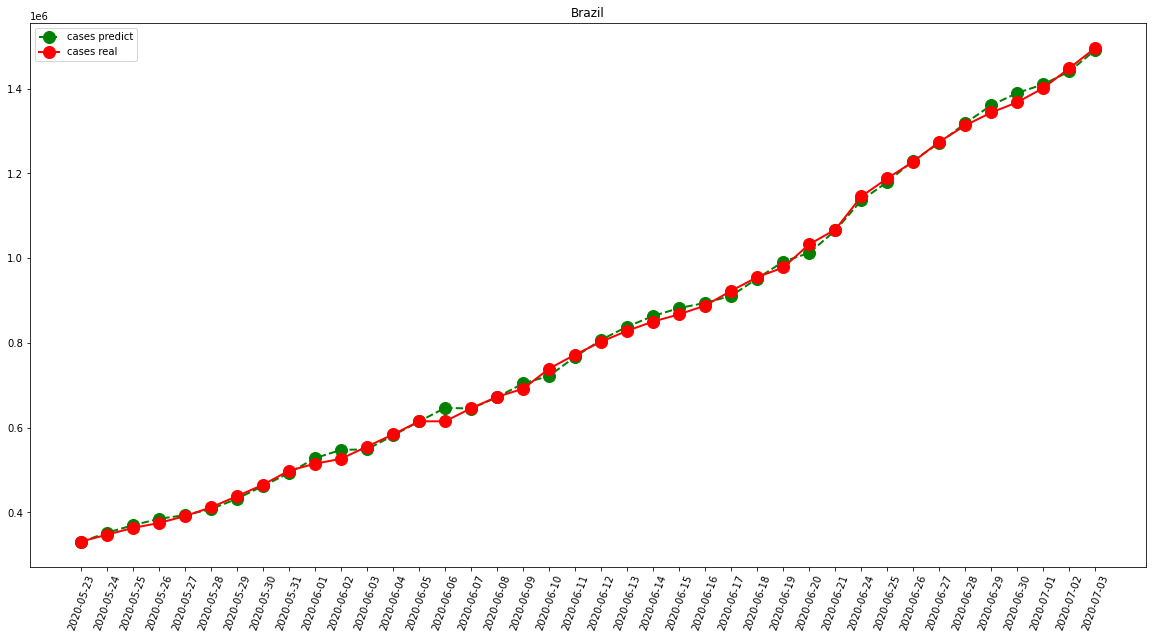

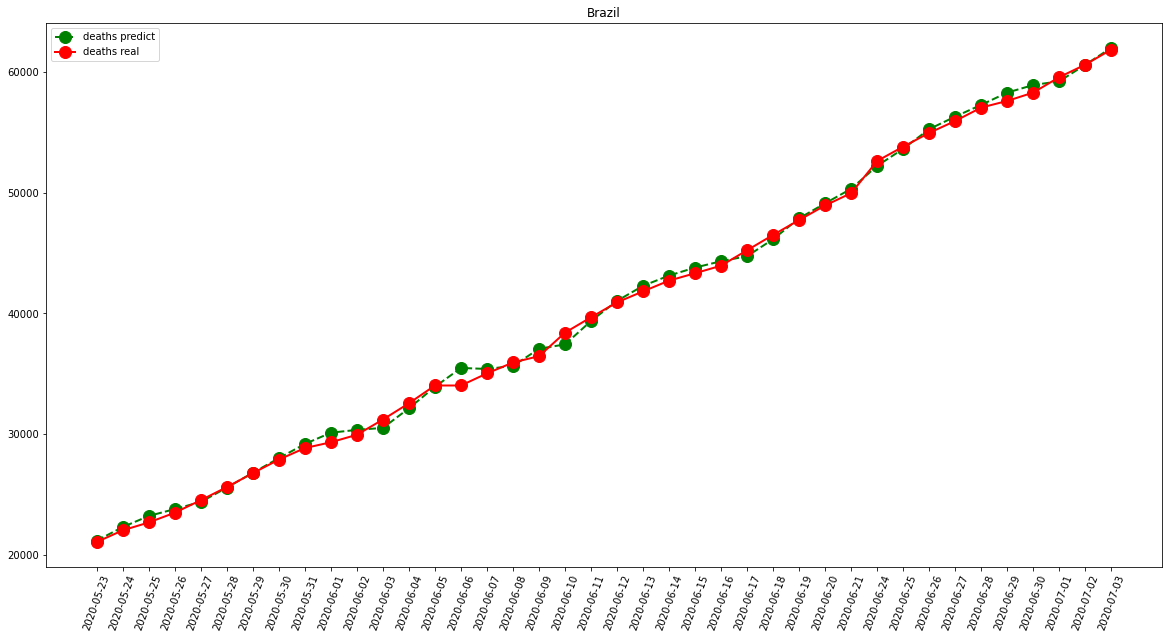

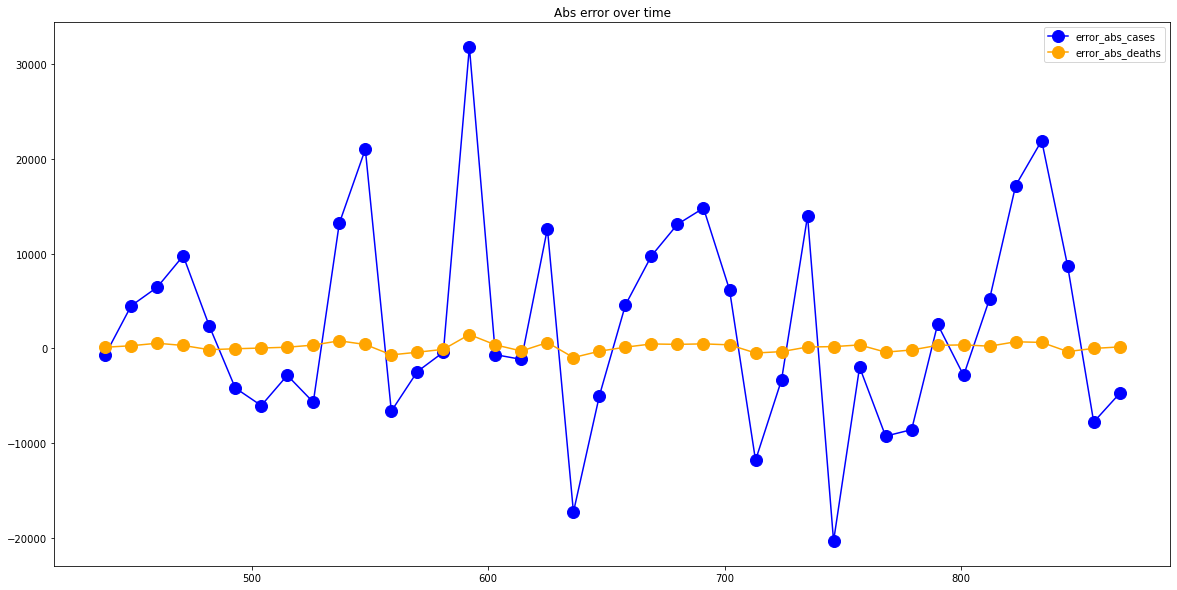

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)